In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from getdata import DataSlicer
from tabulate import tabulate
import scipy.stats as stats
import random
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tabulate import tabulate
import torch

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create an instance of the DataSlicer class
data_path = r"C:\phaseII\static\dataset-individual-Items.csv"
data_path1 = r"C:\phaseII\static\reversed-scored-dataset.csv"
data_slicer = DataSlicer(data_path)
data_slicer1 = DataSlicer(data_path1)
 # Call the functions on the data_slicer instance
df = data_slicer.read_data()
df1 = data_slicer1.read_data()

df_avg = data_slicer.average_scores()

features = df1[['age', 'gender', 'education', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional stability', 'Openness', 'Approval',
       'Love', 'Achievement', 'Perfectionism', 'Entitlement', 'Omnipotence',
       'Autonomy']]
techniques = df_avg[['Social proof', 'Flattery', 'Rht_Question', 'Antanagoge', 'Logic',
       'Authority', 'Pathos', 'Repetition', 'Framing', 'Anaphora']]


x = features[['age', 'gender', 'education', 'Extraversion', 'Agreeableness',
              'Conscientiousness', 'Emotional stability', 'Openness',
              'Approval', 'Love', 'Achievement', 'Perfectionism',
              'Entitlement', 'Omnipotence', 'Autonomy']]

In [53]:
def perform_regression(x, y):
    # Fit the multiple linear regression model
    model = sm.OLS(y, sm.add_constant(x))
    results = model.fit()

    # Print the regression summary
    print(results.summary())
    print()

    # Extract the coefficient and standard error for each variable
    coefficients = results.params[1:]
    standard_errors = results.bse[1:]

    # Create a dataframe to display the coefficients and standard errors
    coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'Standard Error': standard_errors})
    coefficients_df.index = x.columns
    print(coefficients_df)
    print()
    # Print the degrees of freedom
    degrees_of_freedom_model = len(x.columns) - 1
    degrees_of_freedom_residuals = len(y) - len(x.columns)
    print(f"Degrees of Freedom (Model): {degrees_of_freedom_model}")
    print(f"Degrees of Freedom (Residuals): {degrees_of_freedom_residuals}")
    print()
    
    # Calculate the absolute values of coefficients for ranking
    abs_coefficients = np.abs(results.params[1:])

    # Sort the coefficients in descending order of magnitude
    sorted_coefficients = abs_coefficients.sort_values(ascending=False)

    # Print the sorted coefficients with their names
    print("Sorted Coefficients by Magnitude:")
    print(sorted_coefficients)
    

    # Calculate the predicted values
    predicted_values = results.fittedvalues
 # Plot the coefficients with error bars
    fig, ax = plt.subplots(figsize=(6, 8))
    x_pos = range(len(results.params[1:]))
    ax.barh(x_pos, results.params[1:], xerr=results.bse[1:], align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_yticks(x_pos)
    ax.set_yticklabels(x.columns)
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Variable')
    ax.set_title('Coefficients Social Proof Technique')
    plt.tight_layout()
    plt.show()

    
    # Plot the predicted values against the actual values
    plt.scatter(y, predicted_values)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Histogram of residuals
    plt.hist(results.resid, bins='auto', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

    # Q-Q plot of residuals
    stats.probplot(results.resid, dist="norm", plot=plt)
    plt.title("Q-Q plot of Residuals")
    plt.show()

    # Plot the residuals vs fitted values
    plt.scatter(results.fittedvalues, results.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.show()
 

     # Calculate the covariance matrix
#     covariance_matrix = np.cov(x.values, rowvar=False)

# # Plot the covariance matrix heatmap
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=x.columns, yticklabels=x.columns)
#     plt.title("Covariance Matrix")
#     plt.show()

# # Perform Principal Component Analysis (PCA)
#     pca = PCA()
#     pca.fit(x.values)

# # Obtain eigenvalues and eigenvectors
#     eigenvalues = pca.explained_variance_
#     eigenvectors = pca.components_

# # Create a Correlation Circle Plot
#     plt.figure(figsize=(8, 8))
#     for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors)):
#         plt.quiver([0], [0], [eigenvector[0]], [eigenvector[1]], angles='xy', scale_units='xy', scale=0.2, color=f'C{i}', label=f'PC{i+1}')

# # Customize plot labels and grid
#     plt.xlim(-1, 1)
#     plt.ylim(-1, 1)
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.axhline(0, color='black', linewidth=0.5)
#     plt.axvline(0, color='black', linewidth=0.5)
#     plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# # Add variable names as annotations
#     for i, variable in enumerate(x.columns):
#         plt.annotate(variable, (eigenvectors[0, i], eigenvectors[1, i]), color=f'C{i}')

# # Add a legend
#     plt.legend()

# # Show the plot
#     plt.title("Correlation Circle Plot")
#     plt.show()
 





    return results, coefficients, standard_errors, predicted_values

                            OLS Regression Results                            
Dep. Variable:           Social proof   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     11.70
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           4.53e-28
Time:                        00:39:49   Log-Likelihood:                -3970.2
No. Observations:                1995   AIC:                             7972.
Df Residuals:                    1979   BIC:                             8062.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.5408    

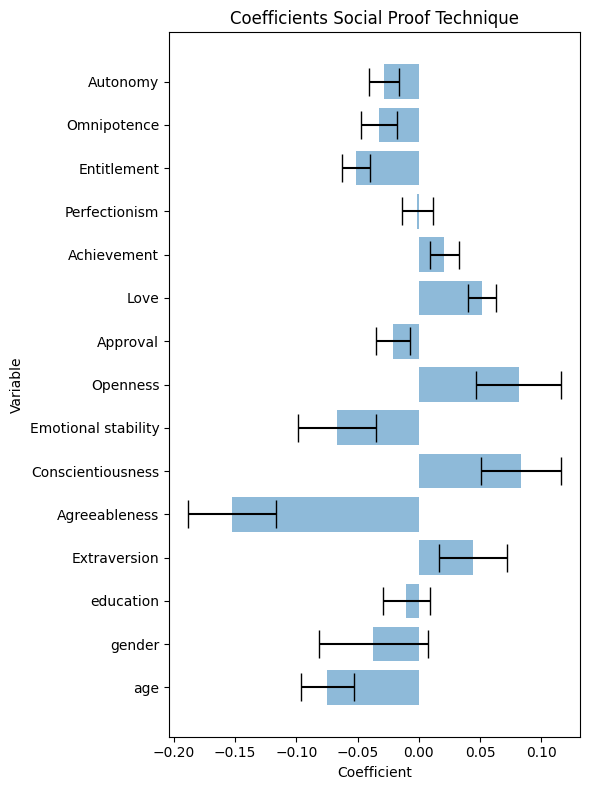

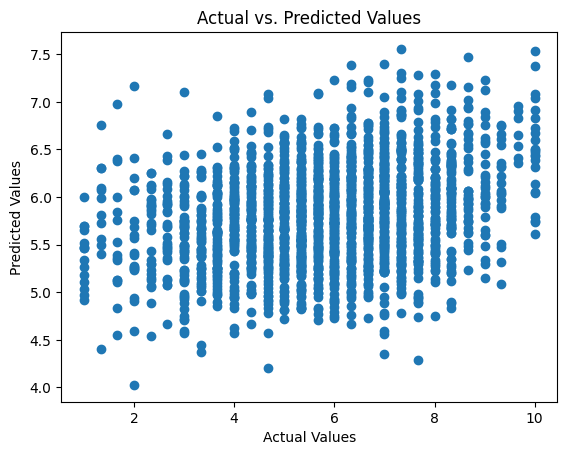

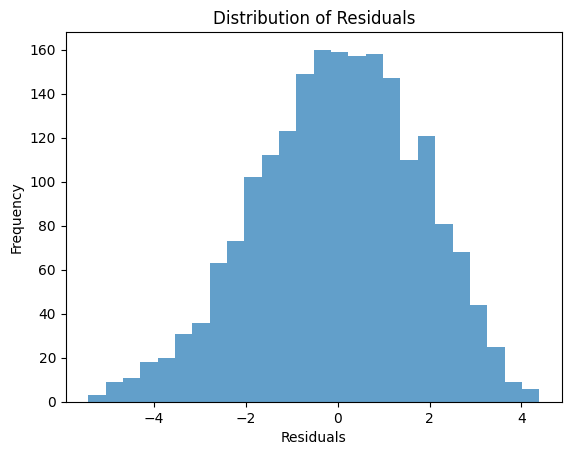

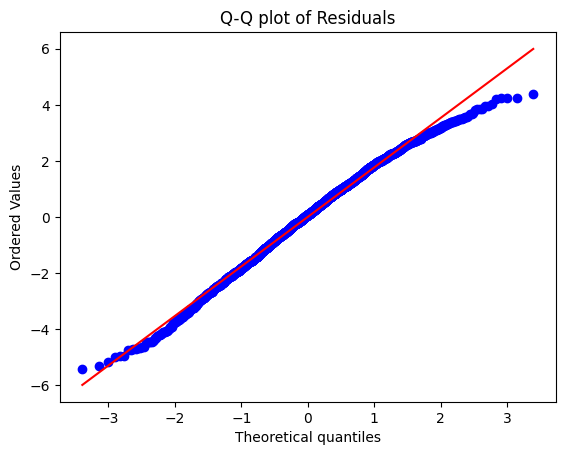

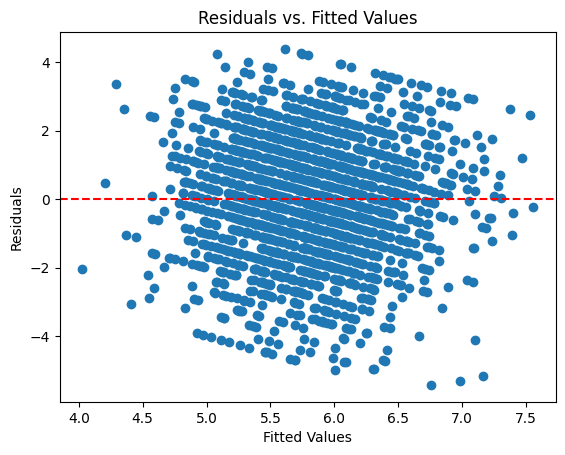

In [54]:
x = features
y = techniques['Social proof']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:                Framing   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     11.27
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           6.87e-27
Time:                        00:11:52   Log-Likelihood:                -3643.9
No. Observations:                1995   AIC:                             7320.
Df Residuals:                    1979   BIC:                             7409.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2020    

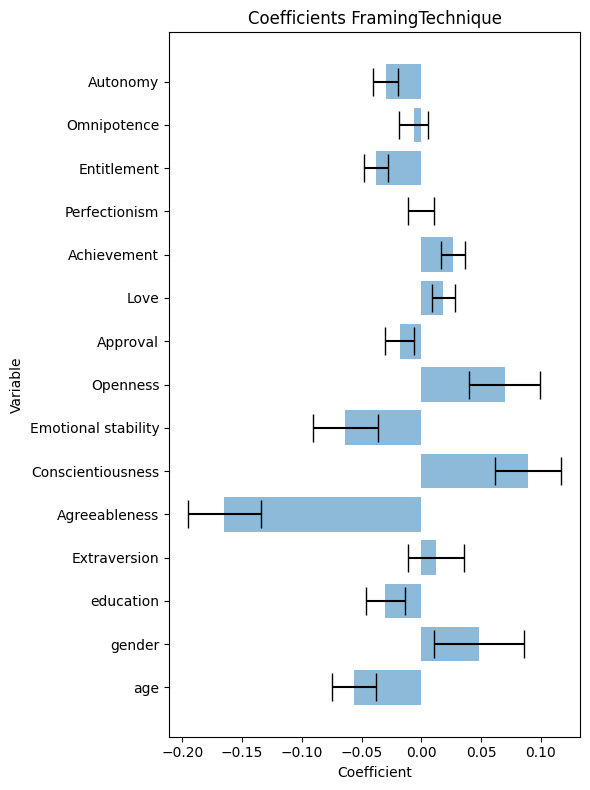

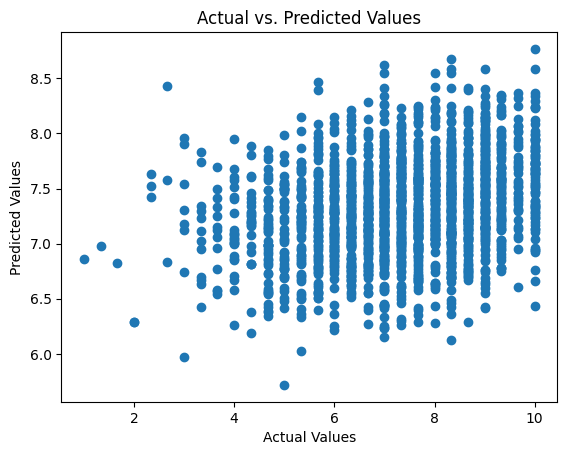

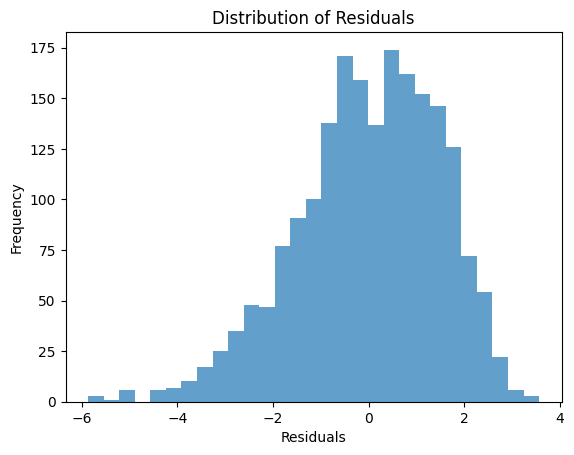

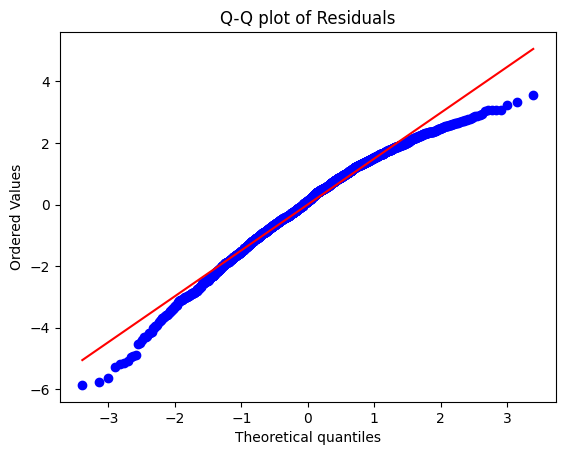

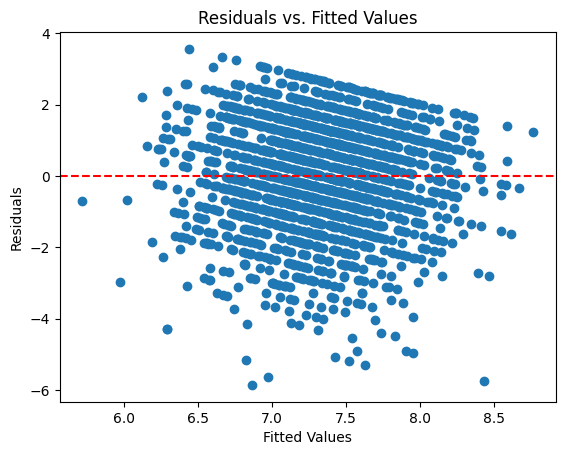

In [35]:
x = features
y = techniques['Framing']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:               Flattery   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     20.75
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           6.83e-53
Time:                        02:16:54   Log-Likelihood:                -4241.8
No. Observations:                1995   AIC:                             8516.
Df Residuals:                    1979   BIC:                             8605.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.9113    

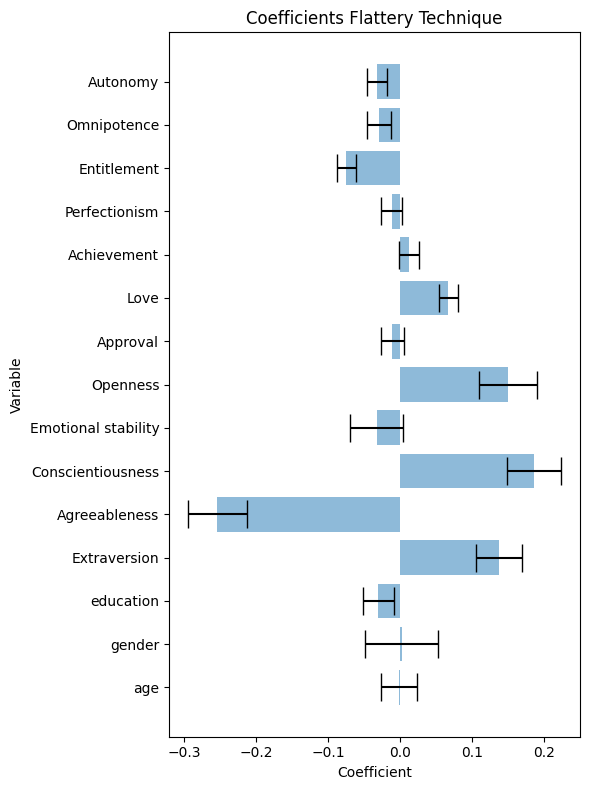

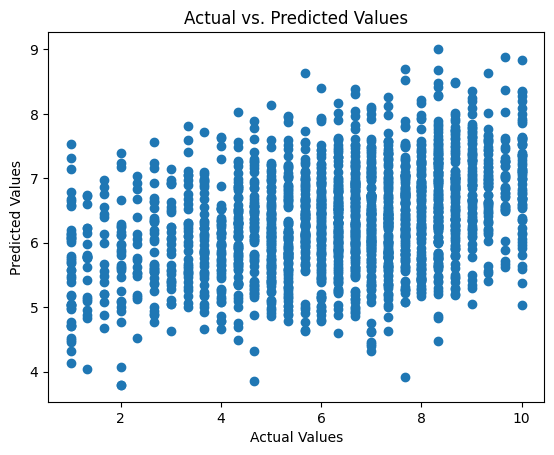

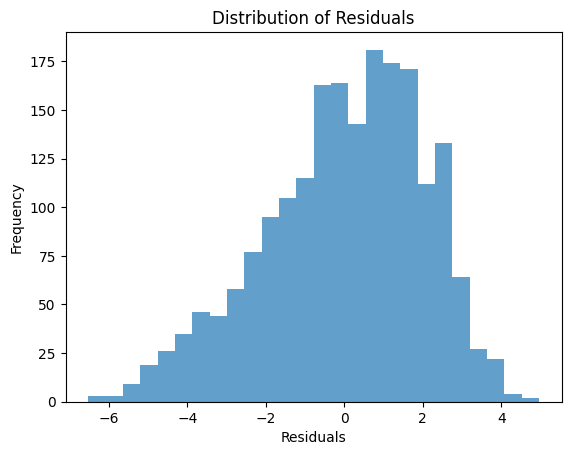

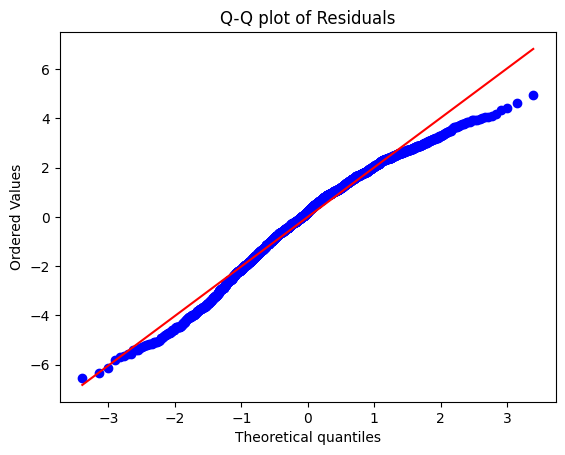

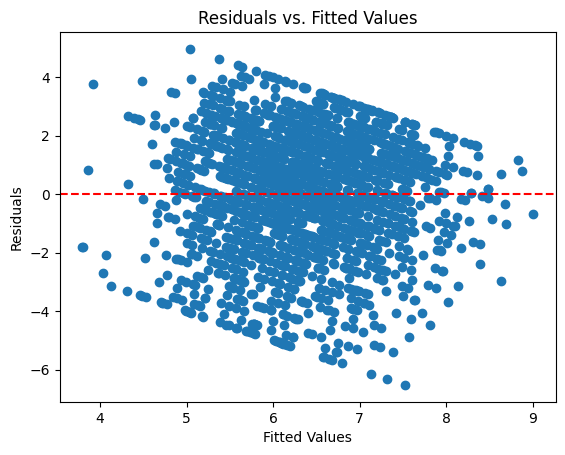

In [37]:
x = features
y = techniques['Flattery']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:              Authority   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     9.932
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           3.56e-23
Time:                        02:24:11   Log-Likelihood:                -3898.0
No. Observations:                1995   AIC:                             7828.
Df Residuals:                    1979   BIC:                             7918.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.9067    

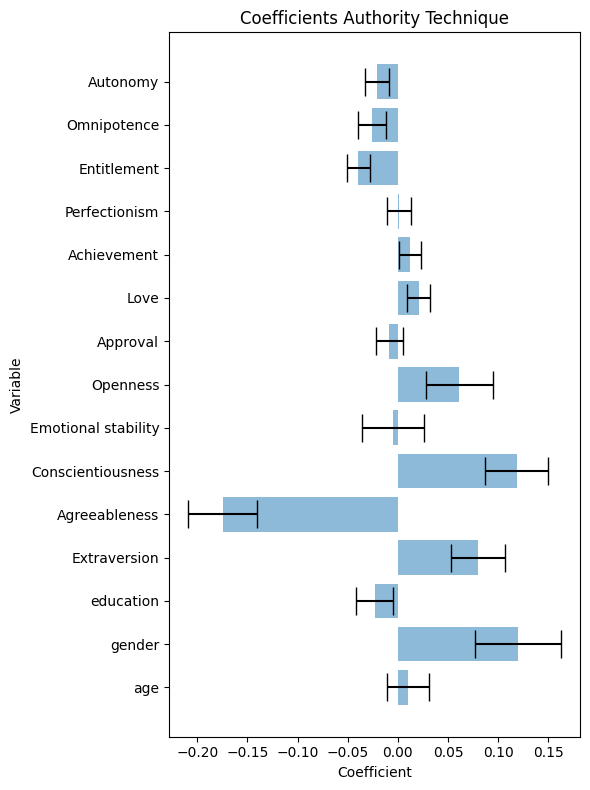

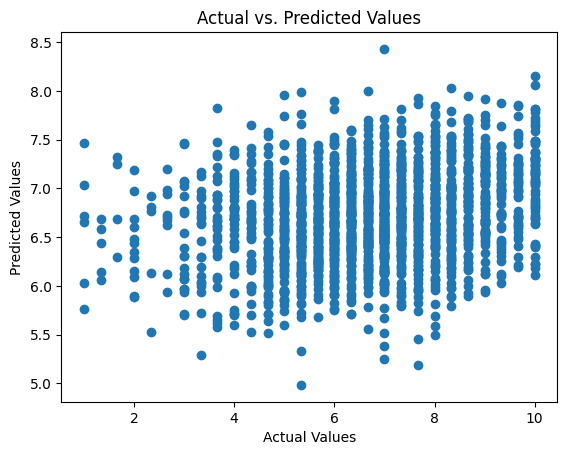

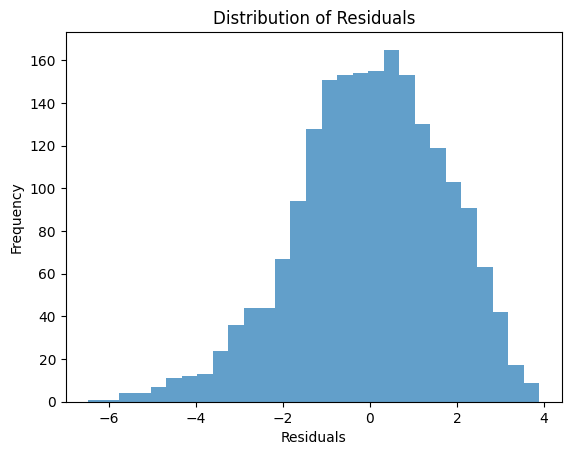

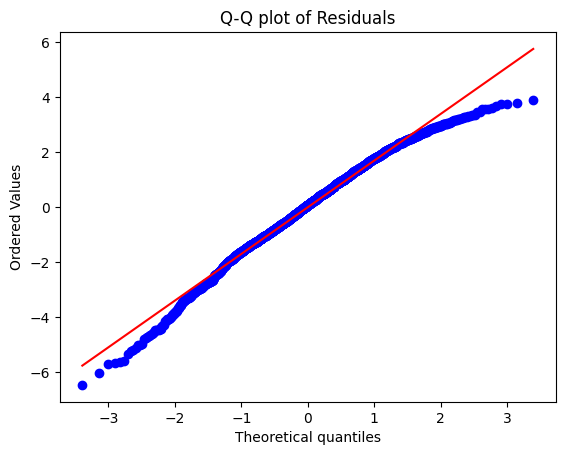

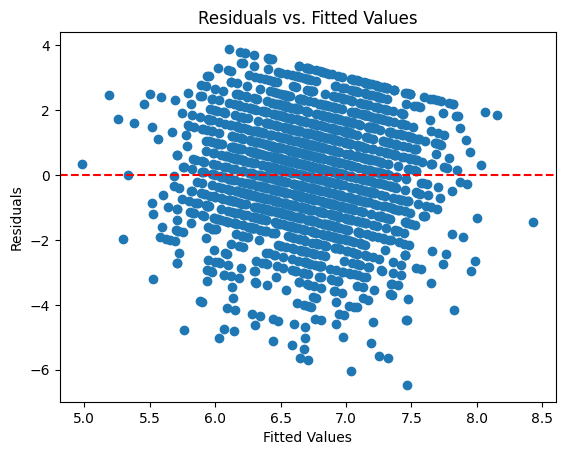

In [39]:
x = features
y = techniques['Authority']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:           Rht_Question   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     16.95
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.40e-42
Time:                        02:59:20   Log-Likelihood:                -4258.9
No. Observations:                1995   AIC:                             8550.
Df Residuals:                    1979   BIC:                             8639.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.8126    

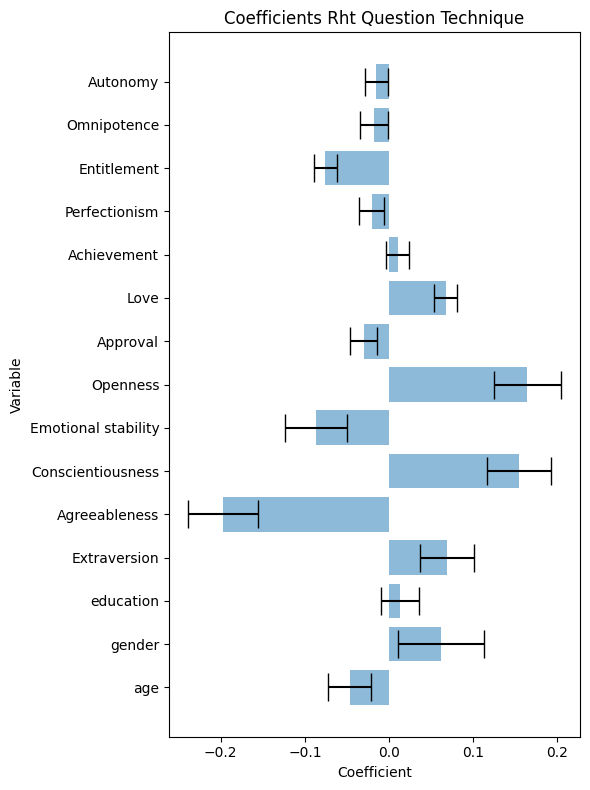

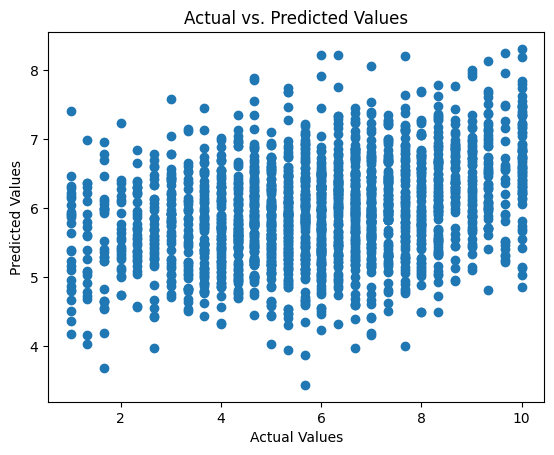

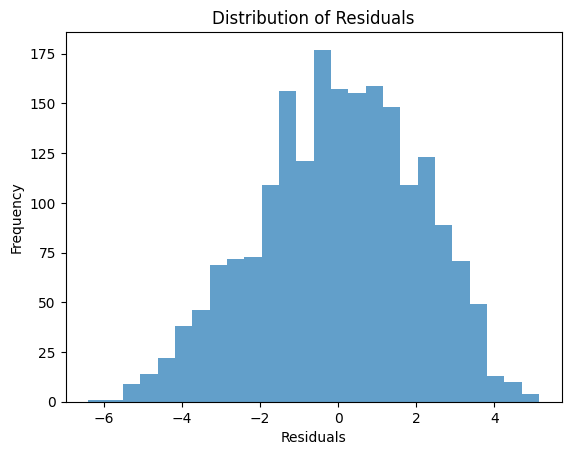

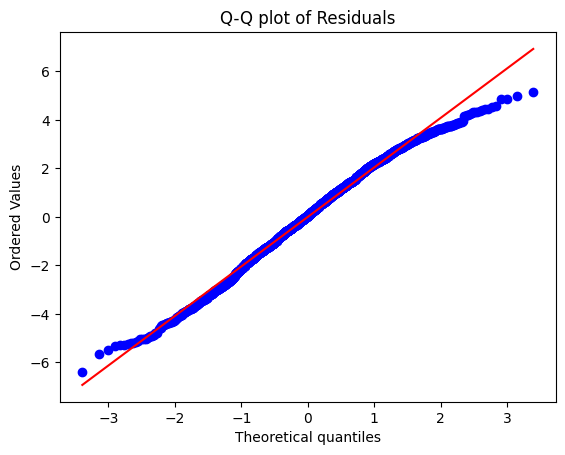

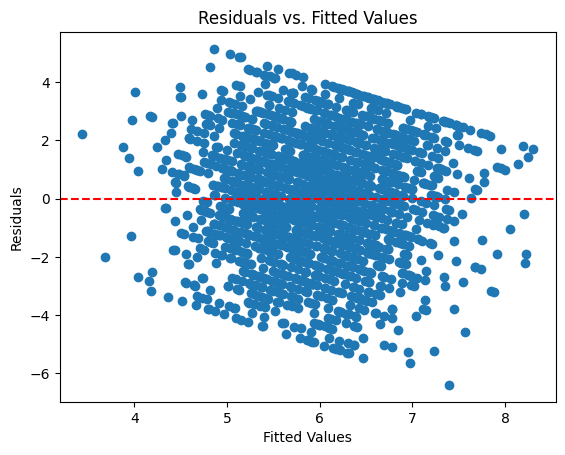

In [41]:
x = features
y = techniques['Rht_Question']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:             Antanagoge   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.125
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           6.06e-21
Time:                        22:33:23   Log-Likelihood:                -4055.9
No. Observations:                1995   AIC:                             8144.
Df Residuals:                    1979   BIC:                             8233.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.7147    

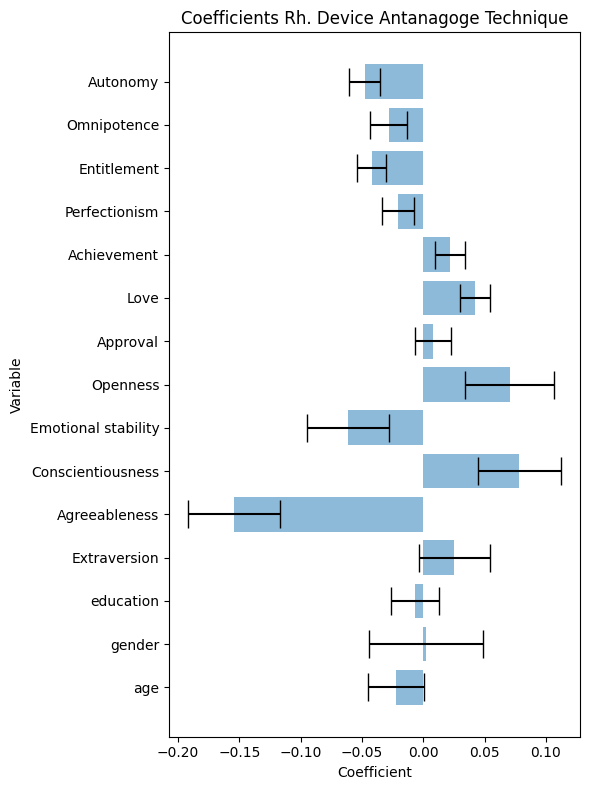

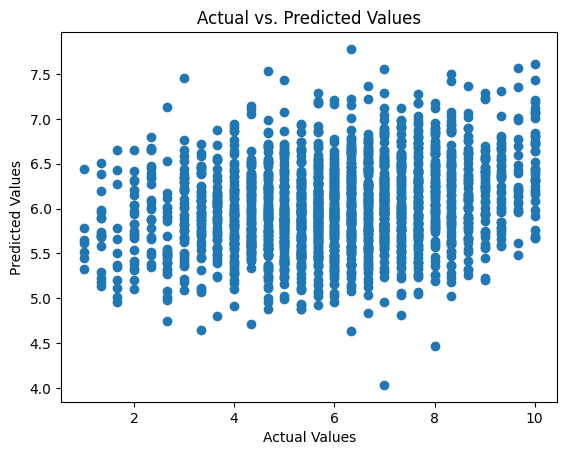

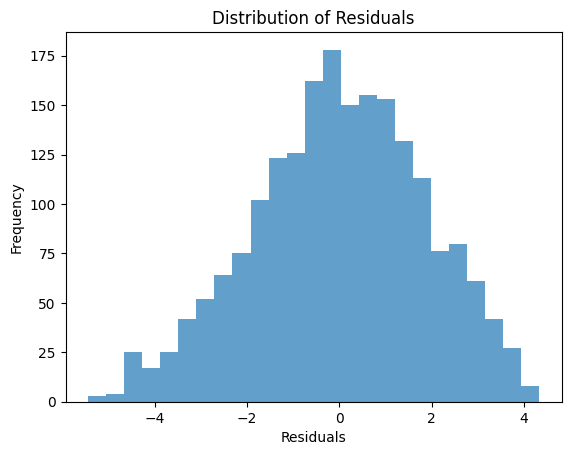

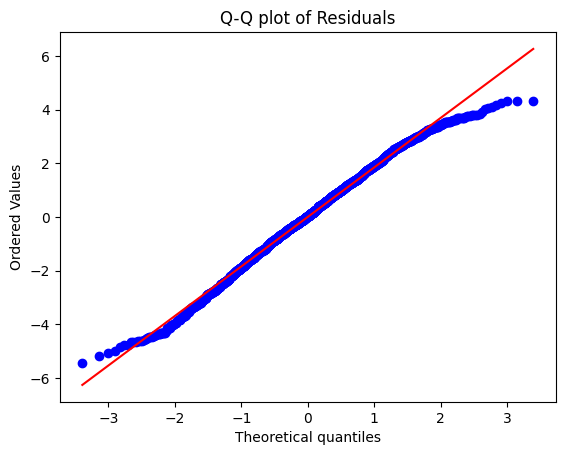

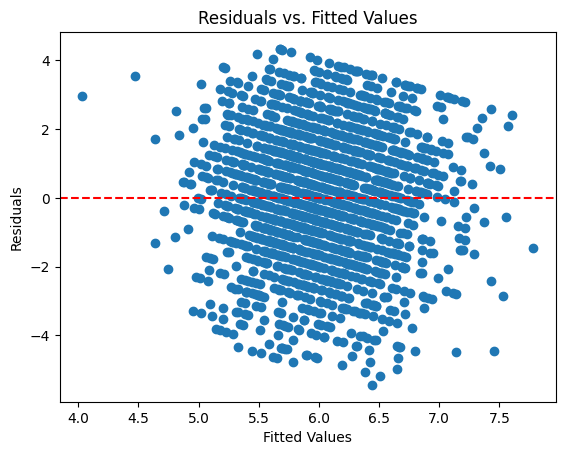

In [43]:
x = features
y = techniques['Antanagoge']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

In [30]:
techniques.columns

Index(['Social proof', 'Flattery', 'Rht_Question', 'Antanagoge', 'Logic',
       'Authority', 'Pathos', 'Repetition', 'Framing', 'Anaphora'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  Logic   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.29e-29
Time:                        23:24:48   Log-Likelihood:                -4136.6
No. Observations:                1995   AIC:                             8305.
Df Residuals:                    1979   BIC:                             8395.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.5637    

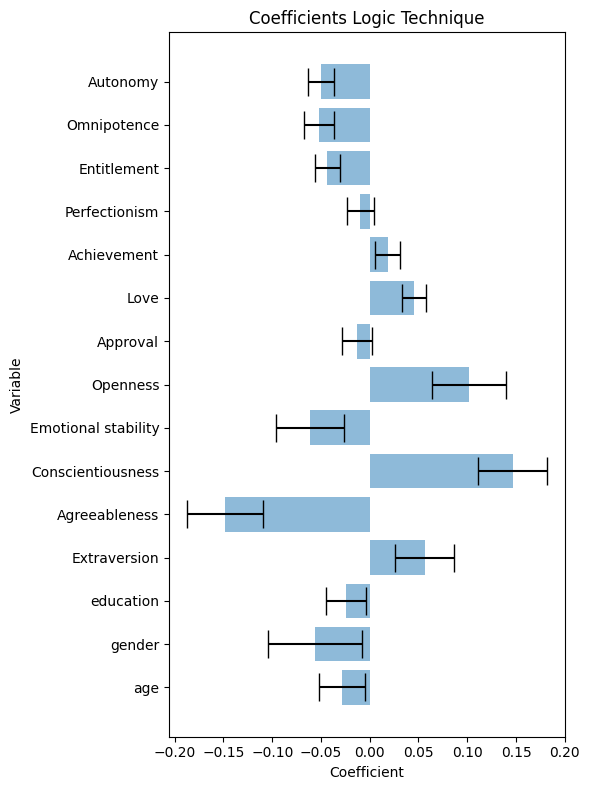

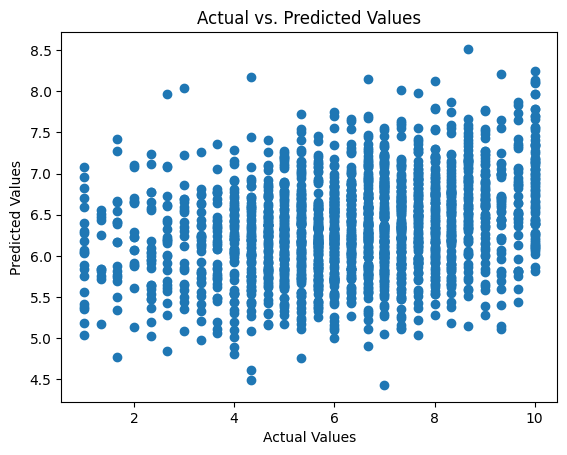

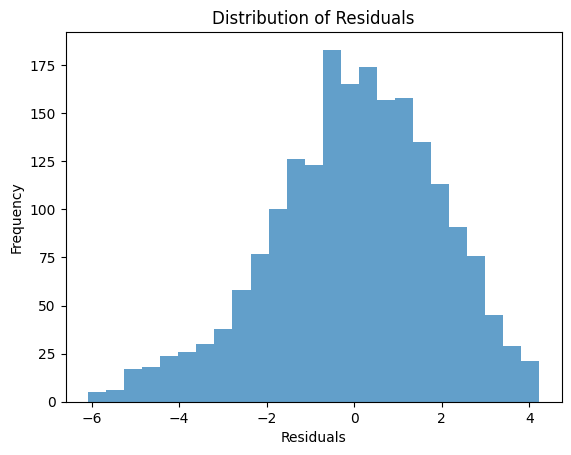

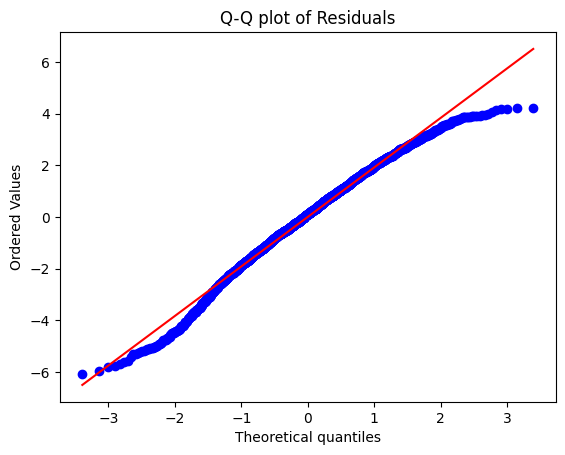

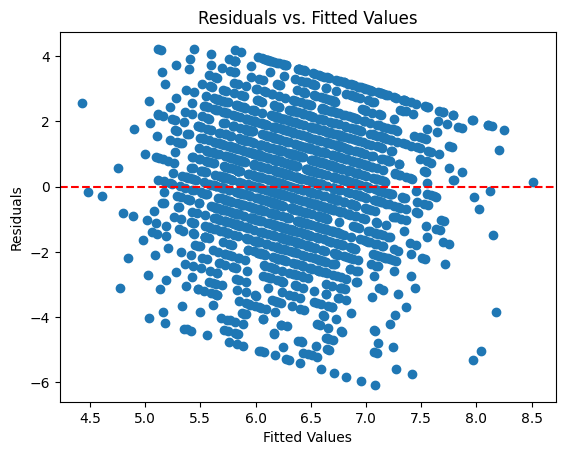

In [48]:
x = features
y = techniques['Logic']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:                 Pathos   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     14.19
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           5.66e-35
Time:                        23:58:23   Log-Likelihood:                -3918.4
No. Observations:                1995   AIC:                             7869.
Df Residuals:                    1979   BIC:                             7958.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0853    

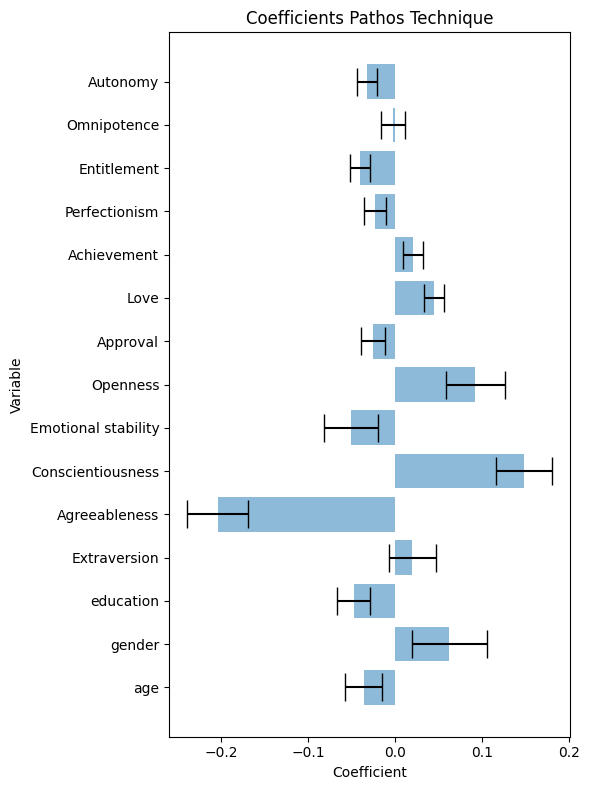

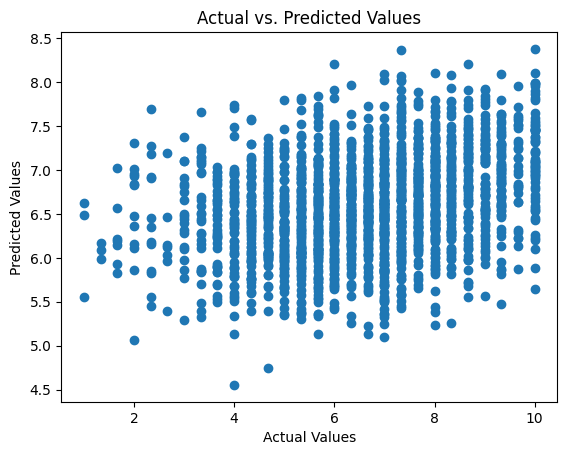

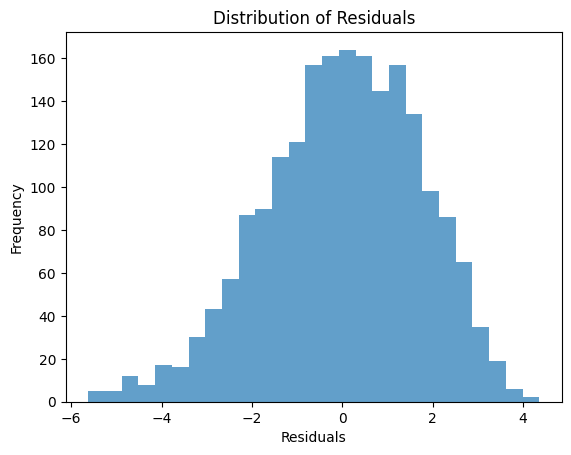

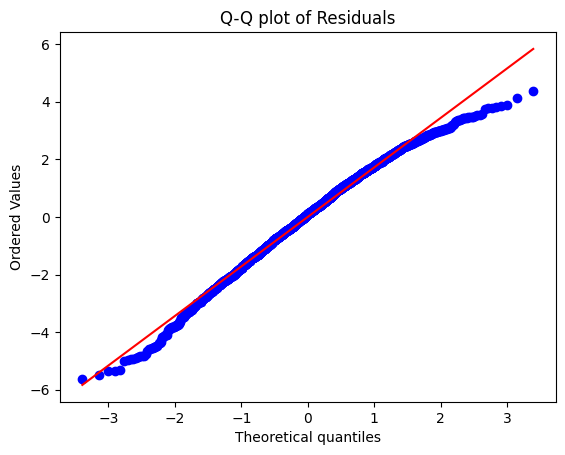

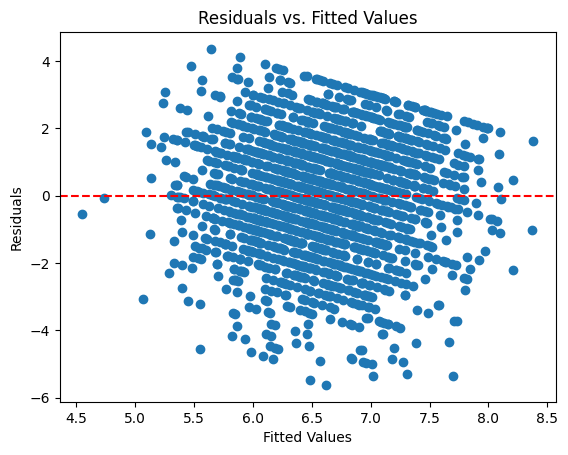

In [50]:
x = features
y = techniques['Pathos']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:             Repetition   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     19.44
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           2.34e-49
Time:                        00:13:22   Log-Likelihood:                -4249.9
No. Observations:                1995   AIC:                             8532.
Df Residuals:                    1979   BIC:                             8621.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.7892    

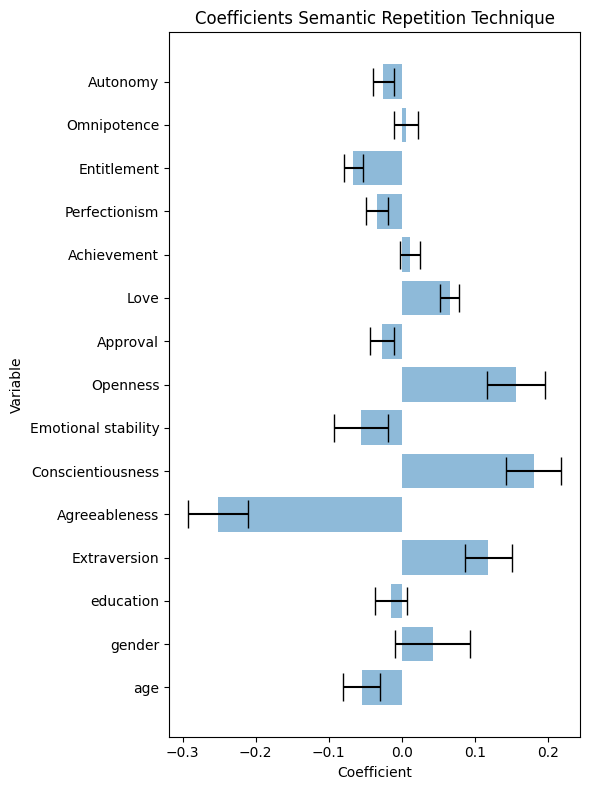

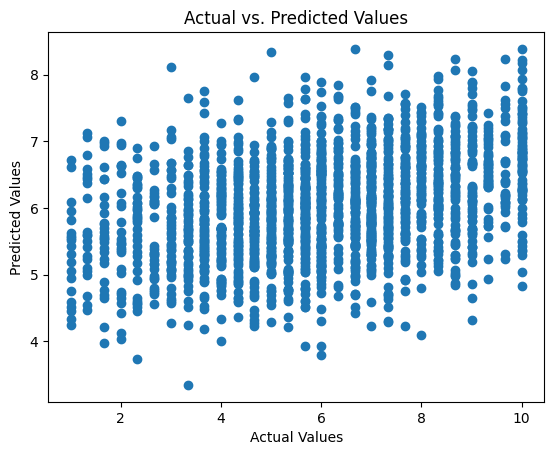

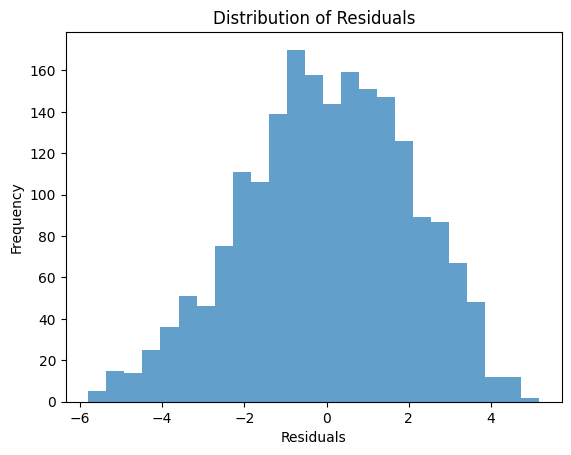

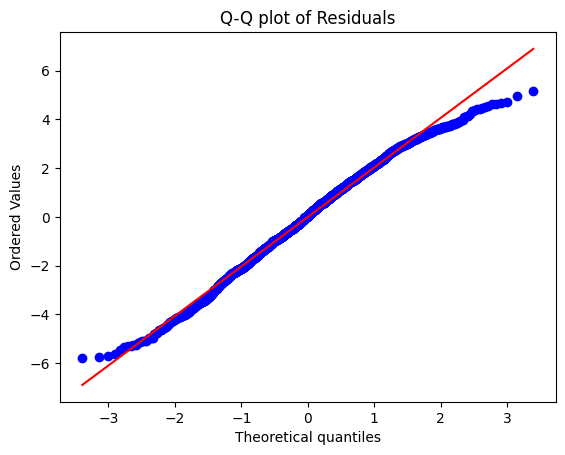

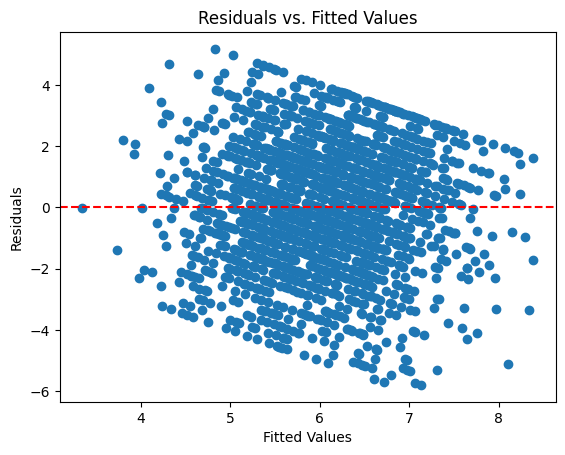

In [52]:
x = features
y = techniques['Repetition']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

                            OLS Regression Results                            
Dep. Variable:               Anaphora   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     13.98
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.17e-34
Time:                        23:09:48   Log-Likelihood:                -3938.2
No. Observations:                1995   AIC:                             7908.
Df Residuals:                    1979   BIC:                             7998.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.5715    

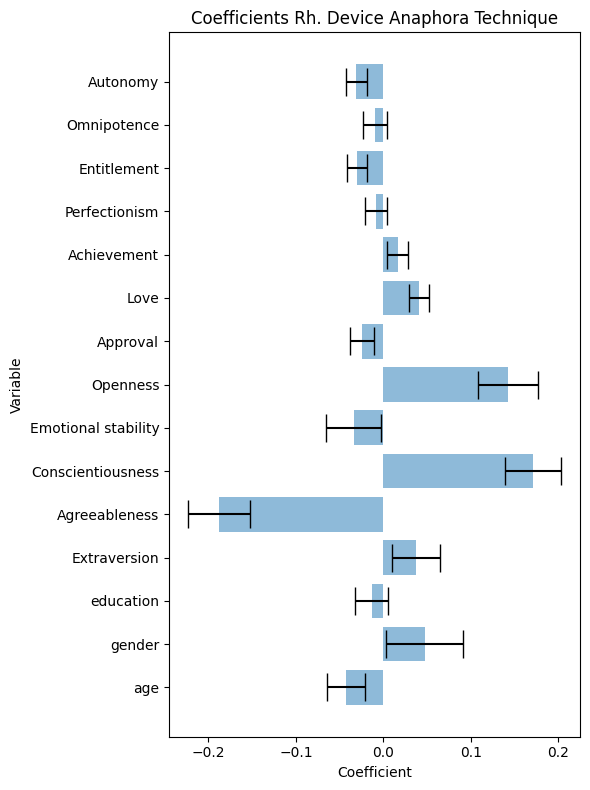

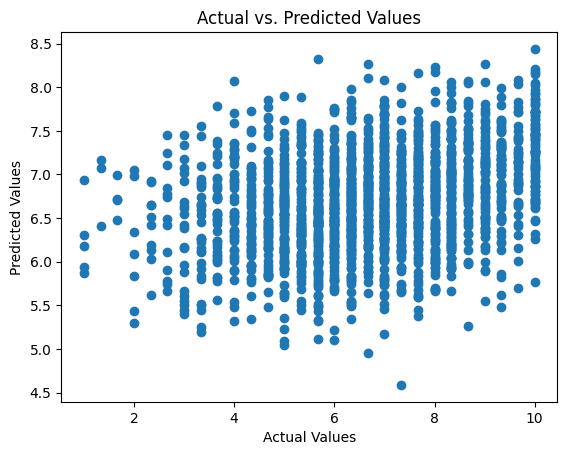

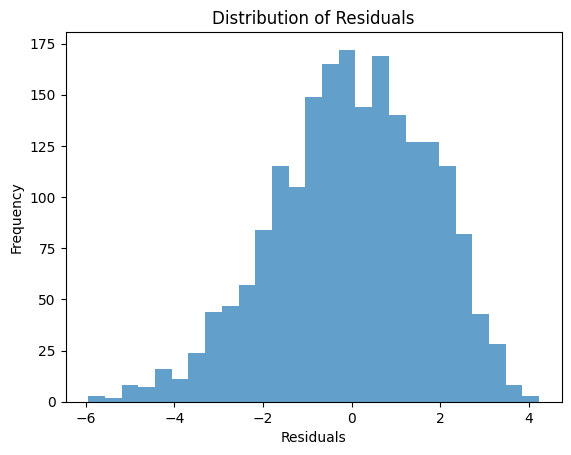

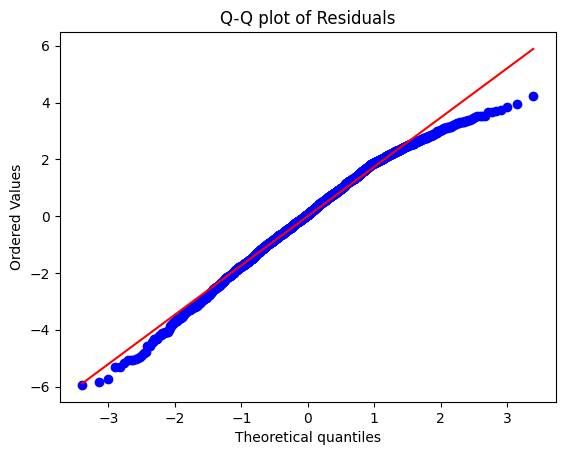

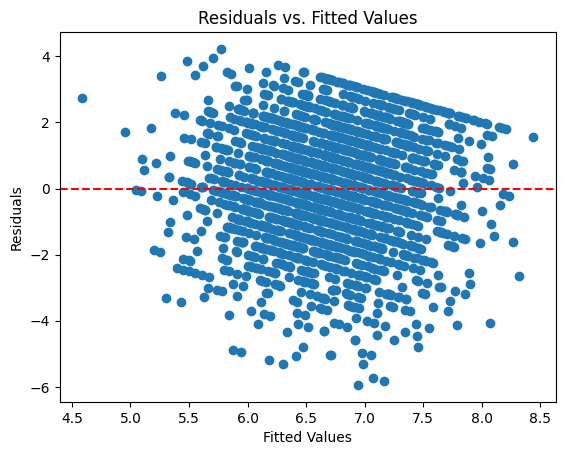

In [46]:
x = features
y = techniques['Anaphora']
results, coefficients, standard_errors, predicted_values = perform_regression(x, y)